# Prueba de evaluación 1 - Parte 2
- Entornos de data science con Python
- Curso 2015/16.
***
- Autor: Juan Antonio García Cuevas
- Fecha: 14/07/2016
***

# Parte 2
En esta segunda parte trabajaremos con un dataset de R que describe las características físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el paquete "ggplot2" con nombre "diamonds".
- Calcula los valores máximo, mínimo y medio de la variable carat.
- Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria del mismo tamaño con puntos obtenidos de una distribución gamma con la misma media y desviación típica. Haz que la visualización sea más adecuada haciendo transparente uno de los histogramas utilizando el parámetro alpha.
- Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.
- Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"
- Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de x, y, z) y el precio, de nuevo en escala logarítmica.
- Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, tomando solo los 1000 primeros valores del dataset.
- Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando al diagrama las distribuciones de las dos variables.
- Identifica con un comando los diferentes tipos de corte (cut).
- Comprueba si hay diferencias significativas en la media del precio para los de corte "Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede asumir que las muestras son de una distribución normal). Puedes investigar funciones lógicas vectorizadas en NumPy como logical_or().
- Obtén la mediana del precio por cada valor de la claridad (clarity) y ordena los resultados de manera descendente.


In [1]:
%matplotlib inline

### Cargar datos de diamantes

In [2]:
import statsmodels.api as sm

rdiamonds = sm.datasets.get_rdataset('diamonds', 'ggplot2')

data = rdiamonds.data
numrows_data, numcols_data = data.shape
print 'Número de filas...:', numrows_data
print 'Número de columnas:', numcols_data
data.head()

Número de filas...: 53940
Número de columnas: 10


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Calcula los valores máximo, mínimo y medio de la variable carat.

In [3]:
import numpy as np

valmin_carat = np.min(data.carat)
valmed_carat = np.mean(data.carat)
valmax_carat = np.max(data.carat)
print 'Valor mínimo de carat:', valmin_carat
print 'Valor medio de carat.:', valmed_carat
print 'Valor máximo de carat:', valmax_carat

Valor mínimo de carat: 0.2
Valor medio de carat.: 0.797939747868
Valor máximo de carat: 5.01


### Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria del mismo tamaño con puntos obtenidos de una distribución gamma con la misma media y desviación típica. Haz que la visualización sea más adecuada haciendo transparente uno de los histogramas utilizando el parámetro alpha.

Desviación típica de carat: 0.47400685051


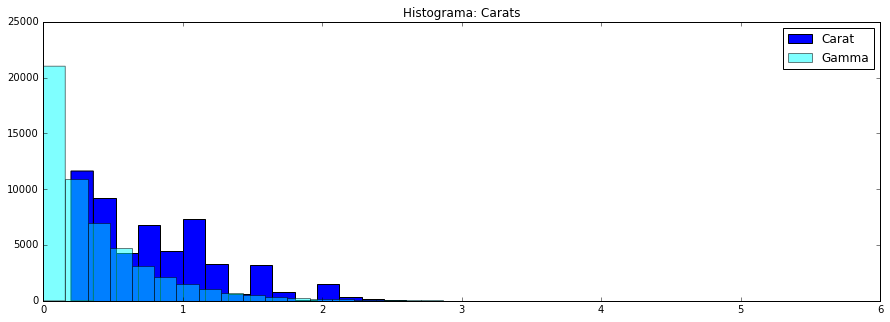

In [4]:
import matplotlib.pyplot as plt

datdsv_carat = np.std(data.carat)
print 'Desviación típica de carat:', datdsv_carat

gamma = np.random.gamma(valmed_carat, datdsv_carat, numrows_data)

fig = plt.figure(1, figsize=(15, 5))
asp = fig.add_subplot(111)

plt.hist(data.carat, bins=30, histtype='bar', color='blue', label='Carat') 
plt.hist(gamma, bins=30, histtype='bar', color='cyan', label='Gamma', alpha=0.5)
plt.title('Histograma: Carats')
plt.legend()
plt.show()

### Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.

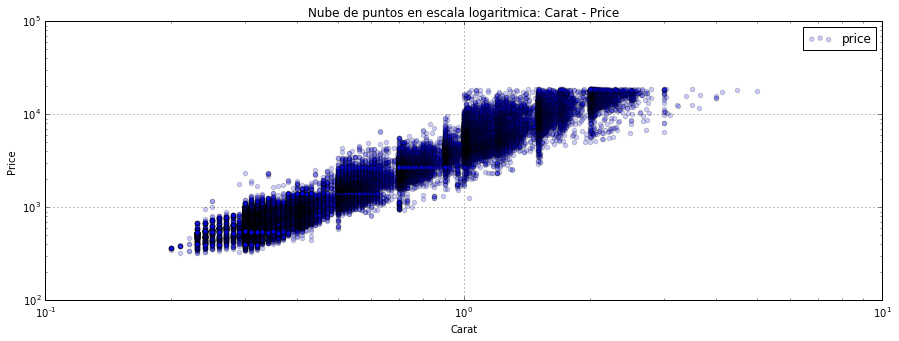

In [5]:
fig = plt.figure(1, figsize=(15, 5))
asp = fig.add_subplot(111)
asp.set_xlabel('Carat')
asp.set_ylabel('Price')
asp.set_yscale('log')
asp.set_xscale('log')

plt.scatter(data.carat, data.price, alpha=0.2)
plt.title('Nube de puntos en escala logaritmica: Carat - Price')
plt.grid(True)
plt.legend()
plt.show()

El precio incrementa con el aumento de quilates.

### Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Número de filas...: 2426
Número de columnas: 10


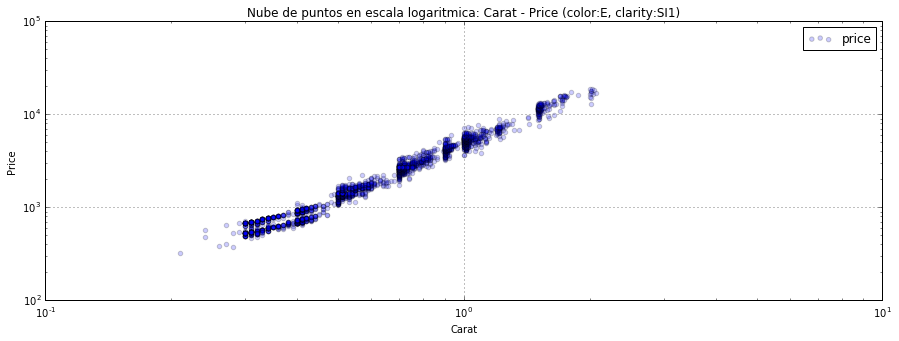

In [6]:
subdata = data[data.color.eq('E')][data.clarity.eq('SI1')]
numrows_subdata, numcols_subdata = subdata.shape
print 'Número de filas...:', numrows_subdata
print 'Número de columnas:', numcols_subdata
subdata.head()

fig = plt.figure(1, figsize=(15, 5))
asp = fig.add_subplot(111)
asp.set_xlabel('Carat')
asp.set_ylabel('Price')
asp.set_yscale('log')
asp.set_xscale('log')

plt.scatter(subdata.carat, subdata.price, alpha=0.2)
plt.title('Nube de puntos en escala logaritmica: Carat - Price (color:E, clarity:SI1)')
plt.grid(True)
plt.legend()
plt.show()


### Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de x, y, z) y el precio, de nuevo en escala logarítmica.

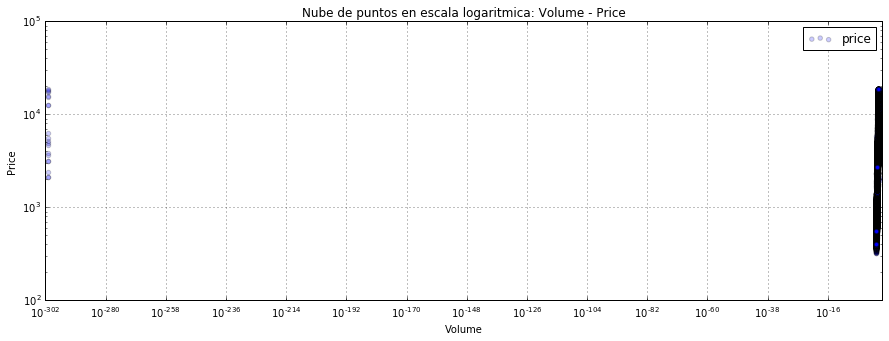

In [7]:
# Añadimos una nueva columna con el volumen (x * y * z)
data['volume'] = data.x * data.y * data.z

fig = plt.figure(1, figsize=(15, 5))
asp = fig.add_subplot(111)
asp.set_xlabel('Volume')
asp.set_ylabel('Price')
asp.set_yscale('log')
asp.set_xscale('log')

plt.scatter(data.volume, data.price, alpha=0.2)
plt.title('Nube de puntos en escala logaritmica: Volume - Price')
plt.grid(True)
plt.legend()
plt.show()

Eliminamos los los datos con volumen <=0 y volvemos a generar el gráfico

Número de filas con volumen > 0: 53920
Se han eliminado 20 filas con volumen <= 0


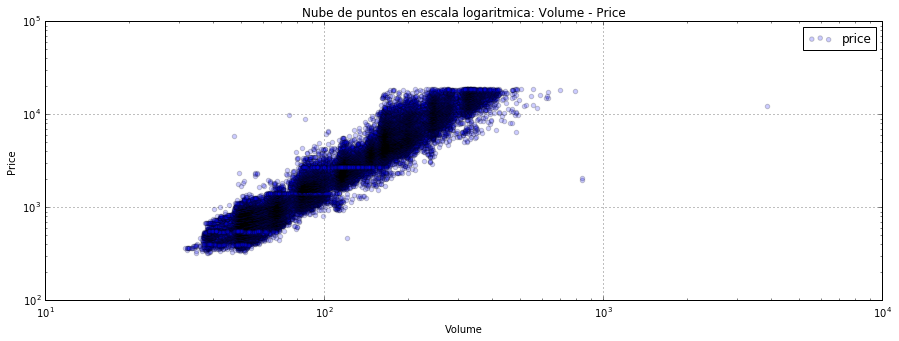

In [8]:
data2 = data[data['volume'] > 0]
numrows2, numcols2 = data2.shape
print 'Número de filas con volumen > 0:', numrows2
print 'Se han eliminado', (numrows_data - numrows2), 'filas con volumen <= 0'

fig = plt.figure(1, figsize=(15, 5))
asp = fig.add_subplot(111)
asp.set_xlabel('Volume')
asp.set_ylabel('Price')
asp.set_yscale('log')
asp.set_xscale('log')

plt.scatter(data2.volume, data2.price, alpha=0.2)
plt.title('Nube de puntos en escala logaritmica: Volume - Price')
plt.grid(True)
plt.legend()
plt.show()

El precio también se incrementa con el tamaño.

### Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, tomando solo los 1000 primeros valores del dataset.

In [9]:
from scipy import stats

data_volume = data2.volume[:1000]
data_price = data2.price[:1000]

slope, intercept, rvalue, pvalue, stderr = stats.linregress(data_volume, data_price)
ylinreg = intercept + slope * (data_volume)

print 'Pendiente de linea de regresion:', slope
print 'Origen de la recta de regresion:', intercept
print 'Coeficiente de correlacion.....:', rvalue
print 'p-value........................:', pvalue
print 'Error estándar de la estimacion:', stderr
print 'Prediccion:\n', ylinreg.head()

Pendiente de linea de regresion: 23.2378936868
Origen de la recta de regresion: -131.647694978
Coeficiente de correlacion.....: 0.864771526831
p-value........................: 8.1360097692e-301
Error estándar de la estimacion: 0.42714664053
Prediccion:
0     756.087017
1     670.195718
2     753.178911
3     954.133128
4    1074.799841
Name: volume, dtype: float64


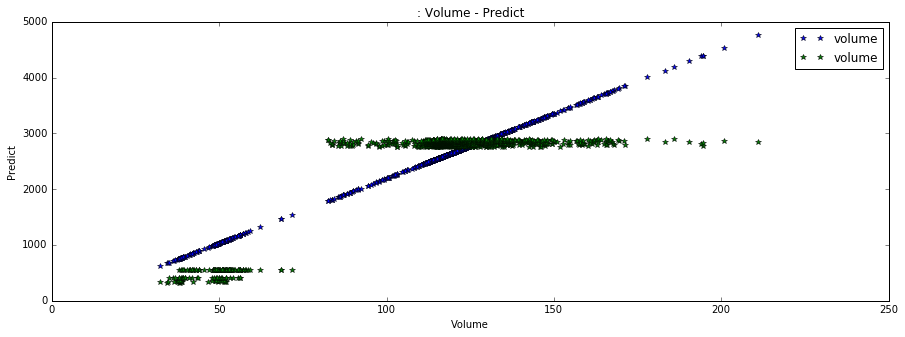

In [10]:
from pylab import plot, show

fig = plt.figure(1, figsize=(15, 5))
asp = fig.add_subplot(111)
asp.set_xlabel('Volume')
asp.set_ylabel('Predict')

plt.plot(data_volume, ylinreg, '*', data_volume, data_price, '*')
plt.title(': Volume - Predict')
plt.legend()
plt.show()

### Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando al diagrama las distribuciones de las dos variables.

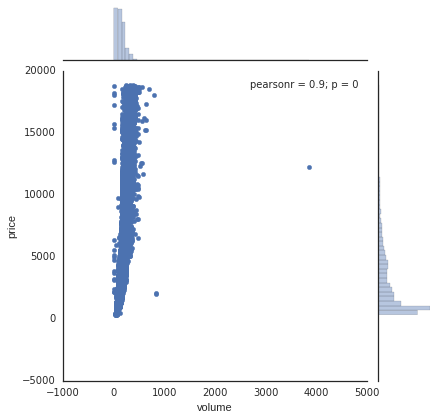

In [11]:
# Si seaborn no está nstalado, ejecutar en un terminal la siguiente instrucción:
# conda install seaborn
import seaborn as sns

sns.set(style='white', color_codes=True)
g = sns.jointplot(x='volume', y='price', data=data)

### Identifica con un comando los diferentes tipos de corte (cut).

In [12]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### Comprueba si hay diferencias significativas en la media del precio para los de corte "Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede asumir que las muestras son de una distribución normal). Puedes investigar funciones lógicas vectorizadas en NumPy como logical_or().

In [13]:
groupby_cut = data[np.logical_or(data['cut'] == 'Ideal', data['cut'] == 'Premium')][['cut', 'price']][:1000]


groupby_cut = groupby_cut.groupby('cut')
for cut, value in groupby_cut['price']: 
    print cut, ':', value.mean()

Ideal : 2591.66835871
Premium : 2547.42298289


/home/juan/anaconda2/lib/python2.7/site-packages/pandas/tools/plotting.py:3079: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


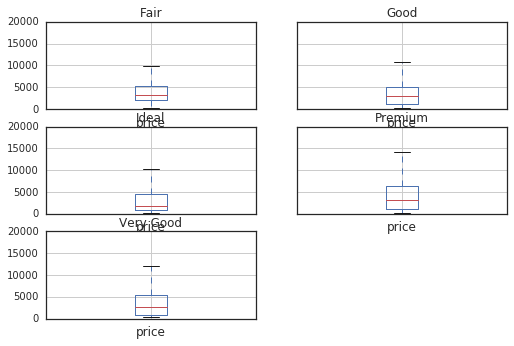

In [14]:
groupby_cut = data.groupby('cut')
groupby_cut.boxplot(column=['price'])
plt.show()

### Obtén la mediana del precio por cada valor de la claridad (clarity) y ordena los resultados de manera descendente.

In [15]:
print(data[['clarity', 'price']].
      groupby(['clarity']).
      median().
      sort_values(by='price', ascending=False)
     )

         price
clarity       
SI2       4072
I1        3344
SI1       2822
VS2       2054
VS1       2005
VVS2      1311
VVS1      1093
IF        1080
